## Wrangling, Assessing, Cleaning and analyzing tweet data 


## Table of Contents

- [Part I - Data Wrangling](#Wrangling)
- [Part II - Assessing](#assessing)
- [Part III - Cleaning](#cleaning)
 - [Part III.1 - Quality](#quality)
 - [Part III.1 - Tidiness](#tidiness)
- [Part IIII - analysing and visualising](#analysis)


<a id='Wrangling'></a>
## Data Wrangling

In [357]:
#loading the requered librery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import nltk
import re
from nltk.chunk import  ne_chunk
from nltk.corpus import stopwords

In [358]:
#lading the tweeter archive dataset
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [359]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [360]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#downloading the tweet image predictions using requests lib
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [361]:
img_predection_df = pd.read_csv('image_predictions.tsv',sep="\t")

In [362]:
img_predection_df.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [363]:
img_predection_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#get tweet data using  Tweepy 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_1.tweet_id.values
count = 0
fails_dict = {}
start = timer()

In [ ]:
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [364]:
tweets_df =  pd.read_json('tweet-json.txt',lines=True,orient="columns")

In [365]:
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

<a id='assessing'></a>
## Data Assessing

In [18]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
len(archive_df.query("doggo!='None' or floofer!='None' or pupper!='None' or puppo!='None'"))

380

In [5]:
archive_df.query("name=='None' and (rating_numerator<10)")[['tweet_id','retweeted_status_id','in_reply_to_status_id','text','rating_numerator','rating_denominator','name']].style.set_properties(subset=['text'], **{'width': '400px'})

,tweet_id,retweeted_status_id,in_reply_to_status_id,text,rating_numerator,rating_denominator,name
315,835152434251116546,nan,nan,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,None
387,826598799820865537,nan,8.26598e+17,"I was going to do 007/10, but the joke wasn't worth the <10 rating",7,10,None
599,798682547630837760,6.76937e+17,nan,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10,None
605,798576900688019456,6.66104e+17,nan,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,None
730,781661882474196992,nan,nan,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10,None
784,775096608509886464,7.40373e+17,nan,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
814,771014301343748096,nan,nan,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7,10,None
906,758041019896193024,nan,nan,Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv,9,10,None
912,757596066325864448,nan,nan,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10,None
946,752568224206688256,nan,nan,Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,9,10,None


In [49]:
archive_df.query("rating_numerator<=10 ")[['tweet_id','retweeted_status_id','in_reply_to_status_id','text','rating_numerator','rating_denominator','name']].style.set_properties(subset=['text'], **{'width': '400px'})

,tweet_id,retweeted_status_id,in_reply_to_status_id,text,rating_numerator,rating_denominator,name
45,883482846933004288,nan,nan,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella
113,870726314365509632,nan,8.70726e+17,@ComplicitOwl @ShopWeRateDogs >10/10 is reserved for dogs,10,10,None
165,860177593139703809,7.61673e+17,nan,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…,10,10,None
212,851861385021730816,8.48289e+17,nan,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,10,10,None
229,848212111729840128,nan,nan,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10,Jerry
232,847962785489326080,nan,nan,This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,10,10,Georgie
274,840698636975636481,nan,8.40698e+17,@0_kelvin_0 >10/10 is reserved for puppos sorry Kevin,10,10,None
275,840696689258311684,nan,nan,I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,10,10,None
281,839290600511926273,8.3929e+17,nan,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,10,10,None
315,835152434251116546,nan,nan,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,None


### Quality 
#### `archive_df` table
- row that are not an original tweet when ever we have a value in (*retweeted_status_id*, *in_reply_to_status_id*) 
- the dog stage is available only for (380 dog).
- sevral tweet have a wrong rating_numerator.
- sevral tweet have a wrong rating_denominator.
- sevral tweet have no name on them.
- tweet with id="840696689258311684"  Kevin  is a person not a dog
- tweet with id="832645525019123713" is not a dog
- change the data type of timestamp  to  pd.datetime
- make dog stage from 4 columns to 1 column

#### `img_predection_df` table

- get the best bread from the 3 algorithm based on precision of the algorithm

### Tidiness

- we have sevral usless columns in all the data frames that need to get ride of 
- in our data we have two entity we have *tweets* and we have *dogs* if we separate each entity in a single file, and connect then with the tweet_id we will have a better data schema.




<a id='cleaning'></a>
## Data Cleaning

## Clean

In [366]:
archive_df_clean = archive_df.copy()
tweets_df_clean = tweets_df.copy()
img_predection_df_clean = img_predection_df.copy()


<a id='quality'></a>
### Quality

**row that are not an original tweet when ever we have a value in (retweeted_status_id, in_reply_to_status_id)**

##### Define

- we need to get the index of each row that has retweeted_status_id!=nan or retweeted_status_user_id!=nan
- then delete those index from the dataframe
- then reset the index


##### code

In [367]:
# get the indexs
index_notweets = archive_df.query("retweeted_status_id!='nan' or in_reply_to_status_id!='nan'").index

In [368]:
# drop indexs from the df
archive_df_clean.drop(index_notweets,inplace=True)

In [369]:
# reset the indexs
archive_df_clean.reset_index(inplace=True)

##### test

In [370]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 18 columns):
index                         2097 non-null int64
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-nu

##### Define
- drop all column with 0 value

##### code

In [371]:
archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

##### test

In [372]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
index                 2097 non-null int64
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(4), object(9)
memory usage: 213.1+ KB


In [22]:
# we can see that the index is reset so evrything is good let's move on
archive_df_clean.head()

,level_0,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**the dog stage is available only for (380 dog)**

##### Define
- for each row where all the stage are None,
- we will use regular expression to get more stage we can from the text




##### Code

In [373]:
texts_serie = archive_df_clean.query("doggo=='None' and floofer=='None' and pupper=='None' and puppo=='None'")['text'].tolist()

In [374]:
archive_df_clean.query("doggo=='None' and floofer=='None' and pupper=='None' and puppo=='None'").head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [375]:
#see reffrence for terms used
def isPupper(text_list):
    terms = ['pup','thin','little','small','pupperinos']
    text_list=[x.lower() for x in text_list] #Normalization
    for term in terms:
        
        if( term in text_list):
            return True
    return False

def isDoggo(text_list):
    terms = ['doggo','dog','big']
    text_list=[x.lower() for x in text_list] #Normalization
    for term in terms:    
        if( term in text_list):
            return True
    return False
def isPuppo(text_list):
    terms = ['puppo']
    text_list=[x.lower() for x in text_list] #Normalization
    for term in terms:    
        if( term in text_list):
            return True
    return False
def isFloofer(text_list):
    terms = ['fluffy','floofer','floofs']
    text_list=[x.lower() for x in text_list] #Normalization
    for term in terms:    
        if( term in text_list):
            return True
    return False

In [376]:
index=0
for text in texts_serie:
    text_token =nltk.tokenize.regexp_tokenize(text,r"[^\s,;\.،…:\(\)\[\]!\?؟’\n\"'\+\*\\/%=<>«»]+")
    if(isFloofer(text_token)):
        archive_df_clean.loc[index,['floofer']]='floofer'   
    elif(isPuppo(text_token)):
        archive_df_clean.loc[index,['puppo']]='puppo'
    elif(isPupper(text_token)):
        archive_df_clean.loc[index,['pupper']]='pupper'
    elif(isDoggo(text_token)):
        archive_df_clean.loc[index,['doggo']]='doggo' 
    index+=1


##### Test

In [377]:
len(archive_df_clean.query("doggo!='None' or floofer!='None' or pupper!='None' or puppo!='None'"))

639

**now we have 639 row with dog stage this not bad**

**sevral tweet have a wrong rating_numerator. and sevral tweet have a wrong rating_denominator.**

##### Define
- we try to find all rating_numerator<10 and all rating_denominator !=10
- we try to find the right  rating_numerator and rating_denominator using regexp and some data structure and replace the wrong one


##### Code

In [378]:
TextWrongRating = archive_df_clean.query("(rating_numerator<10) or (rating_denominator!=10)")['text']

In [379]:
numerator = pd.Series()
denominator = pd.Series()

#x = x.set_value(i, i**2)
x=0
for (index,text) in TextWrongRating.iteritems():
    
    allrating = re.findall(r'(\d(?:\d)?(?:\.\d)?\/\d(?:\d)?)',text)
    if(len(allrating)>1):
        
        #print(text)
        #print(allrating)
        finalRating=""
        for rating in allrating:
            ratingSplited=rating.split('/')
            if(ratingSplited[1]!='10'):
                continue
            elif(float(ratingSplited[0])>9.0):
                finalRating=rating
        if(finalRating!=""):            
            ratingSplited=finalRating.split('/')
            numerator.set_value(index,int(ratingSplited[0]))
            denominator.set_value(index,int(ratingSplited[1]))
            
print(numerator.index)
print(denominator)

Int64Index([853, 948, 985, 1234, 1278, 1426, 1719], dtype='int64')
853     10
948     10
985     10
1234    10
1278    10
1426    10
1719    10
dtype: int64


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [380]:
archive_df_clean.iloc[numerator.index,6]=numerator
archive_df_clean.iloc[denominator.index,7]=denominator

##### Test

In [381]:
archive_df_clean.iloc[numerator.index,6]

853     14
948     13
985     11
1234    13
1278    10
1426    10
1719    11
Name: rating_numerator, dtype: int64

In [382]:
archive_df_clean.iloc[denominator.index,7]

853     10
948     10
985     10
1234    10
1278    10
1426    10
1719    10
Name: rating_denominator, dtype: int64

**sevral tweet have no name on them.**

##### Define
- we try to find the name of the dog using Named Entity Extraction using NLTK librery


##### Code

In [383]:
text_dogs_with_no_name=archive_df_clean.query("name=='None'")['text']

In [384]:
len(text_dogs_with_no_name)

603

In [385]:
#this fonction preProcess a tweet from link and tags etc...
def process_text(text):
    """Remove emoticons, numbers etc. and returns list of cleaned tweets."""
    
    regex_remove = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^RT|http.+?"
    
    return re.sub(regex_remove, '',text).strip()

In [386]:
# in the pace code we are training our Part of Speech POS tagger using Hiden Markove Model or N-gram tagger
mysents = nltk.corpus.brown.tagged_sents()
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(mysents, backoff=t0)
t2 = nltk.BigramTagger(mysents, backoff=t1)

In [387]:
# new we add stop word from the english language and some word that can't be a name of a dog
# based on sevrel observation of the results
sw_EN = set(stopwords.words('english'))
sw_EN.add("Pup")
sw_EN.add("Pupper") 
sw_EN.add("Son")
sw_EN.add("Heres")
sw_EN.add("Enjoys")
sw_EN.add("Sorry")
sw_EN.add("Weve")
sw_EN.add("Ill")

In [388]:
# new we itirate over all text where we dont a have a name and try to find a name
new_names = pd.Series()
for (index,text) in text_dogs_with_no_name.iteritems():
    
    text_words=process_text(text).split() # split the tweet 
    #POS_tagged_sent = nltk.pos_tag(text_words)  
    POS_tagged_sent= t2.tag(text_words) # if you dont have the NLTK corpus downloaded you can use the previous line
    ne_tree = ne_chunk(POS_tagged_sent) # named Entity tagger
    for ne in ne_tree:
        if(type(ne)==nltk.tree.Tree):  
            if(ne.label()=='PERSON'):# if the tag is PERSON (we dont have a DOG Tag :p)
                if(ne.leaves()[0][0] not in sw_EN):# if the word is not in the stopWord set (cos you know sometime the tagger make mistaks)
                    new_names.set_value(index,ne.leaves()[0][0])
                
    
    #print(t2.tag(text_words))
    
    

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [389]:
archive_df_clean.iloc[new_names.index,8]=new_names

##### Test

In [390]:
archive_df_clean.iloc[new_names.index,:]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
182,226,848690551926992896,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,https://twitter.com/dog_rates/status/848690551...,12,10,Furry,None,None,None,None
215,268,841439858740625411,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14,10,Salute,None,None,None,None
219,275,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,Kevin,None,None,pupper,None
245,314,835172783151792128,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,https://twitter.com/dog_rates/status/835172783...,12,10,Tongued,None,None,None,None
249,318,834574053763584002,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,https://twitter.com/dog_rates/status/834574053...,13,10,Sneaky,doggo,None,None,None
295,375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,Doobert,None,None,None,None
307,390,826240494070030336,2017-01-31 01:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,https://twitter.com/dog_rates/status/826240494...,11,10,Albanian,None,None,None,None
312,395,825535076884762624,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,Appears,None,None,None,puppo
422,539,806576416489959424,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,https://twitter.com/deadspin/status/8065709331...,13,10,Fumble,None,None,None,None
449,580,800459316964663297,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,https://twitter.com/dog_rates/status/800459316...,12,10,Appears,None,None,pupper,None


- **tweet with id="840696689258311684" Kevin is a person not a dog**
- **tweet with id="832645525019123713" is not a dog**

##### Define
- we remove the tweet with id=840696689258311684
- we remove the tweet with id=832645525019123713 


##### Code

In [391]:
index=archive_df_clean[archive_df_clean.tweet_id==840696689258311684].index

In [392]:
archive_df_clean.drop(index,inplace=True)

In [393]:
index=archive_df_clean[archive_df_clean.tweet_id==832645525019123713].index

In [394]:
archive_df_clean.drop(index,inplace=True)

In [ ]:
archive_df_clean.reset_index(inplace=True)

##### Test

In [396]:
archive_df_clean[archive_df_clean.tweet_id==832645525019123713]
archive_df_clean[archive_df_clean.tweet_id==840696689258311684]



,level_0,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**make dog stage form 4 column to 1 column**

##### Define
- iterate over all rows 
- transfrom the information in 4 to 1 column

##### Code

In [398]:
dog_stages = pd.Series()
for i in archive_df_clean.index:
    
    if(archive_df_clean.iloc[i].doggo != 'None'):
        
        dog_stages.set_value(i,'doggo')
    elif(archive_df_clean.iloc[i].floofer != 'None'):
        dog_stages.set_value(i,'floofer')
    elif(archive_df_clean.iloc[i].pupper != 'None'):
        dog_stages.set_value(i,'pupper')
    elif(archive_df_clean.iloc[i].puppo != 'None'):
        dog_stages.set_value(i,'puppo')
    else:
        dog_stages.set_value(i,np.nan)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please u

In [399]:
archive_df_clean['dog_stage']=dog_stages


In [400]:
archive_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Test

In [401]:
archive_df_clean.head()

,level_0,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,pupper
2,2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


**change the data type of timestamp to pd.datetime**

##### Define
- use  pd.to_datetime to change the data type of the column timestamp

##### Code

In [402]:
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

##### Test

In [331]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 11 columns):
level_0               2095 non-null int64
index                 2095 non-null int64
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  2095 non-null object
dog_stage             638 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 180.1+ KB


**get the best breed from the 3 algorithm based on precision of the algorithm**

##### Define
- itirate over all rows
- if px_dog is true
- find the max px_conf over the three algos


##### Code

In [254]:
img_predection_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed'],
      dtype='object')

In [403]:
breeds = pd.Series()


for index,row in img_predection_df_clean.iterrows():
    maxConf=0
    breed=""
    if(row['p1_dog']==True):
        maxConf=row['p1_conf']
        breed=row['p1']
    if(row['p2_dog']==True and row['p2_dog']>maxConf):
        maxConf=row['p2_conf']
        breed=row['p2']
    if(row['p3_dog']==True and row['p3_dog']>maxConf):
        maxConf=row['p3_conf']
        breed=row['p3']
    if(row['p1_dog']==False and row['p2_dog']==False and row['p3_dog']==False):
        breed="None"
    breeds.set_value(index,breed)
   
        

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [404]:
img_predection_df_clean['breed']=breeds

In [405]:
img_predection_df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

##### test

In [406]:
img_predection_df_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Doberman


<a id='tidiness'></a>
###  Tidiness

In [188]:
len(tweets_df_clean)

2354

In [407]:
tweets_df_we_need = tweets_df_clean[['id','retweet_count','favorite_count']]

In [187]:
len(tweets_df_we_need)

2354

In [408]:
merged_inner = pd.merge(left=tweets_df_we_need, right=archive_df_clean, left_on='id', right_on='tweet_id')

In [409]:
merged_inner.columns

Index(['id', 'retweet_count', 'favorite_count', 'level_0', 'index', 'tweet_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [410]:
tweets = merged_inner[['id', 'retweet_count', 'favorite_count','timestamp', 'source', 'text', 'expanded_urls']]

In [411]:
tweets.head()

,id,retweet_count,favorite_count,timestamp,source,text,expanded_urls
0,892420643555336193,8853,39467,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,6514,33819,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,4328,25461,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,8964,42908,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,9774,41048,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


In [412]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 7 columns):
id                2095 non-null int64
retweet_count     2095 non-null int64
favorite_count    2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
expanded_urls     2092 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 130.9+ KB


In [413]:
dogs = merged_inner[['id','rating_numerator',
       'rating_denominator', 'name', 'dog_stage']]

In [414]:
dogs.head()

,id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,13,10,Phineas,NaN
1,892177421306343426,13,10,Tilly,pupper
2,891815181378084864,12,10,Archie,NaN
3,891689557279858688,13,10,Darla,NaN
4,891327558926688256,12,10,Franklin,NaN


In [415]:
dogs=pd.merge(left=dogs, right=img_predection_df_clean, left_on='id', right_on='tweet_id')

In [416]:
dogs.head()

,id,rating_numerator,rating_denominator,name,dog_stage,tweet_id,jpg_url,img_num,breed
0,892420643555336193,13,10,Phineas,NaN,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None
1,892177421306343426,13,10,Tilly,pupper,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,papillon
2,891815181378084864,12,10,Archie,NaN,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,kelpie
3,891689557279858688,13,10,Darla,NaN,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,12,10,Franklin,NaN,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_short-haired_pointer


In [417]:
dogs.drop('tweet_id',axis=1,inplace=True)

In [418]:
dogs.head()

,id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed
0,892420643555336193,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None
1,892177421306343426,13,10,Tilly,pupper,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,papillon
2,891815181378084864,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,kelpie
3,891689557279858688,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_short-haired_pointer


In [419]:
dogs.to_csv('dogs.csv',index=False)

In [420]:
tweets.to_csv('twitter_archive_master.csv',index=False)


<a id='analysis'></a>
## Analysing and Visualising

In [421]:
dogs = pd.read_csv('dogs.csv')

In [422]:
tweets = pd.read_csv('twitter_archive_master.csv')
tweets.timestamp=pd.to_datetime(tweets.timestamp)

In [352]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
id                2095 non-null int64
retweet_count     2095 non-null int64
favorite_count    2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
expanded_urls     2092 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 114.6+ KB


**what are the top 15 dog names**

Text(0, 0.5, 'Dog name')

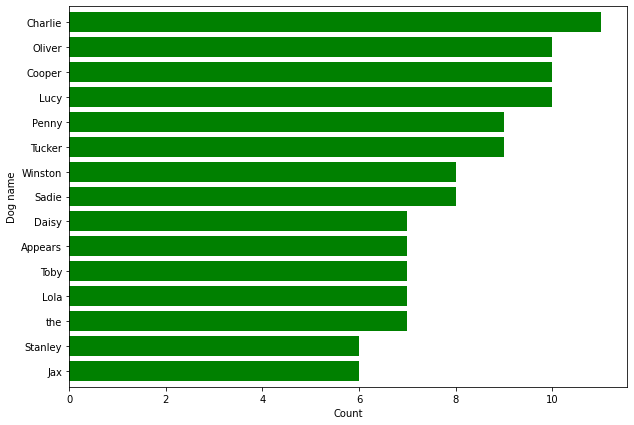

In [423]:
plt.figure(figsize=[10,7])
dogs.query("name!='None' and name!='a'").name.value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.8,color='green')
plt.xlabel('Count')
plt.ylabel('Dog name')

**how did the acount evoluate over time (by month) in terms of number of retweet count and favorite count**

Text(0, 0.5, 'Count')

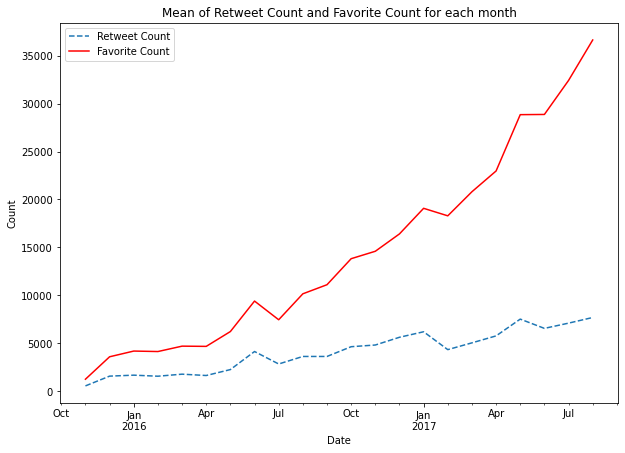

In [424]:
plt.figure(figsize=[10,7])
tweets.groupby(tweets['timestamp'].dt.to_period("M")).mean()['retweet_count'].plot(label='Retweet Count',linestyle='--')
tweets.groupby(tweets['timestamp'].dt.to_period("M")).mean()['favorite_count'].plot(label='Favorite Count',color='red')
plt.title('Mean of Retweet Count and Favorite Count for each month')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')

>According to the plot  the acount gained more and more popularity over a Year and half, that a big deal on tweeter!

In [425]:
dogs.head(1)

,id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed
0,892420643555336193,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None


**the 15 most popular breed dog**

Text(0, 0.5, 'Dog breed')

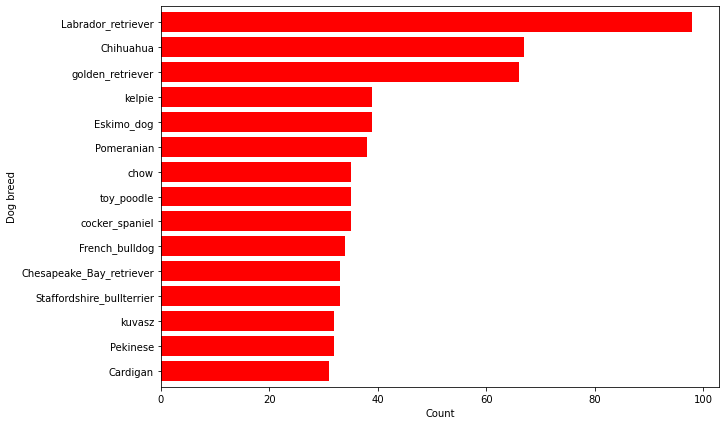

In [426]:
plt.figure(figsize=[10,7])
dogs.query("breed!='None'").breed.value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.8,color='red')
plt.xlabel('Count')
plt.ylabel('Dog breed')

>According to the plot Laborador retriver  is the most popular dog breed 

**the most popular dog stage poster by the account**

Text(0, 0.5, 'Dog Stage')

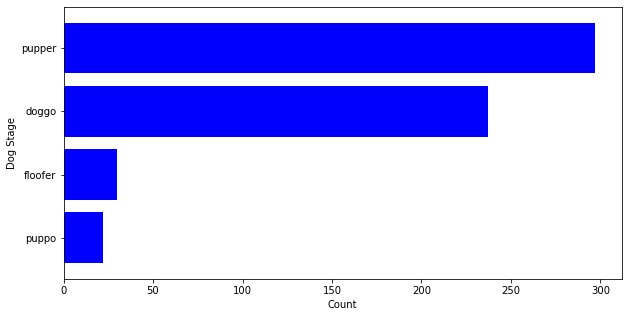

In [427]:
plt.figure(figsize=[10,5])
dogs.dog_stage.value_counts().sort_values(ascending=True).plot.barh(width=0.8,color='b')
plt.xlabel('Count')
plt.ylabel('Dog Stage')

>According to the plot pupper are the most frequent and popular, let be honest no one can resiste pupper !!

## Reference

- https://docs.python.org/3/library/re.html#re.findall
- https://algorithmia.com/blog/text-mining-tweets-named-entity-recognition
- https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
- https://stackoverflow.com/questions/14841997/how-to-navigate-a-nltk-tree-tree
- https://pythonspot.com/nltk-stop-words/
- *Steven Bird, Ewan Klein, and Edward Loper. 2009. Natural Language Processing with Python (1st. ed.). O’Reilly Media, Inc.*
- https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html